In [1]:
import pandas as pd

df = pd.read_parquet("hf://datasets/m2af/ko-emotion-dataset/data/train-00000-of-00001.parquet")

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [2]:
df.head(10)

,created_date,source,context,annotation,__index_level_0__
0,2024-02-03,X,보는동안 너무 행복했고 초콜렛이 너무 먹고싶었고 티모시가 잘생겼고 울어!!하는부분이...,"[{'annotator': 'A', 'emotion': '기쁨_만족감', 'gend...",0
1,2024-02-07,X,어릴 때 가 보고 빕스는 거의 처음인데(기억에 없음) 지금 딸기축제 기간이라 만족스...,"[{'annotator': 'A', 'emotion': '기쁨_만족감', 'gend...",1
2,2024-02-08,X,미리 계좌로 환전해둔 돈을 해외에서 환전수수료 없이 인출 가능한 트레블로그라는 카드...,"[{'annotator': 'A', 'emotion': '기쁨_만족감', 'gend...",2
3,2024-02-09,X,요즘 번아웃도 자꾸 올라오고 무기력해서 종강하고 교류하기도 버거운 상태가 와부렀으요ㅠㅠ,"[{'annotator': 'C', 'emotion': '슬픔_무기력', 'gend...",3
4,2024-02-10,X,크라임씬 장똥민이 범행 도구 찾으려고 화장실 탱크 뒤지는데 거기에 진짜 똥 넣어놓은...,"[{'annotator': 'A', 'emotion': '기쁨_즐거움', 'gend...",4
5,2024-02-11,X,가슴이 답답해짐 진짜 개답답해짐\n우리진짜투표잘하자,"[{'annotator': 'E', 'emotion': '싫어함(상태)_답답함', ...",5
6,2024-02-11,X,"도가니 이후로 이렇게 분노만 가득 남은 영화는 오랜만,,,,,,,,,,진짜 뭐 하나...","[{'annotator': 'C', 'emotion': '분노_발열', 'gende...",6
7,2024-02-12,X,지그재그랑 에이블리랑 할인 대결하나\n아 흐뭇해\n계속되길...\n영원히....,"[{'annotator': 'A', 'emotion': '기쁨_만족감', 'gend...",7
8,2024-02-12,X,나는 솔직히 미인대회도 소름이지만 이때 도파민 쳐돌았음 크루즈에서 크라임씬 최초 연...,"[{'annotator': 'E', 'emotion': '기쁨_즐거움', 'gend...",8
9,2024-02-13,X,어쩌라는 건지 다 말해놓고 기분나쁘게 받아들이지말라어쩌고\n꿀밤 개씨게때려야함,"[{'annotator': 'D', 'emotion': '분노_불쾌', 'gende...",9


In [3]:
# 데이터를 csv로 저장
df.to_csv("dataframe.csv", index=False)

In [4]:
!pip install openpyxl

In [5]:
# 데이터를 xlsx로 저장
df.to_excel("dataframe.xlsx", index=False)

In [6]:
df.columns

Index(['created_date', 'source', 'context', 'annotation', '__index_level_0__'], dtype='object')

In [9]:
display(df['annotation'].unique())

# {'annotator': 'A', 'emotion': '기쁨_만족감', 'gender': 'F'}

array(["[{'annotator': 'A', 'emotion': '기쁨_만족감', 'gender': 'F'}, {'annotator': 'B', 'emotion': '기쁨_만족감', 'gender': 'M'}, {'annotator': 'C', 'emotion': '기쁨_감동', 'gender': 'F'}, {'annotator': 'E', 'emotion': '기쁨_감동', 'gender': 'F'}, {'annotator': 'D', 'emotion': '기쁨_만족감', 'gender': 'M'}]",
       "[{'annotator': 'A', 'emotion': '기쁨_만족감', 'gender': 'F'}, {'annotator': 'C', 'emotion': '기쁨_만족감', 'gender': 'F'}, {'annotator': 'B', 'emotion': '기쁨_만족감', 'gender': 'M'}, {'annotator': 'E', 'emotion': '기쁨_만족감', 'gender': 'F'}, {'annotator': 'D', 'emotion': '기쁨_만족감', 'gender': 'M'}]",
       "[{'annotator': 'C', 'emotion': '슬픔_무기력', 'gender': 'F'}, {'annotator': 'A', 'emotion': '싫어함(상태)_무기력', 'gender': 'F'}, {'annotator': 'E', 'emotion': '슬픔_무기력', 'gender': 'F'}, {'annotator': 'B', 'emotion': '슬픔_무기력', 'gender': 'M'}, {'annotator': 'D', 'emotion': '슬픔_무기력', 'gender': 'M'}]",
       ...,
       "[{'annotator': 'D', 'emotion': '미움(상대방)_반감', 'gender': 'M'}, {'annotator': 'B', 'emotion': '미움(상대방)_불신감'

In [11]:
import ast

# 'annotation' 컬럼에서 감정(emotion) 값을 추출하는 함수 정의
def extract_emotions(annotation_string):
    try:
        # 문자열을 파이썬 리터럴 (리스트와 딕셔너리)로 안전하게 평가
        annotations = ast.literal_eval(annotation_string)
        # 각 항목에서 'emotion' 키의 값을 추출 (만약 'emotion' 키가 존재한다면)
        emotions = [item['emotion'] for item in annotations if 'emotion' in item]
        return emotions
    except (ValueError, SyntaxError):
        # 문자열이 유효한 리터럴이 아닌 경우 빈 리스트 반환
        return []

# 'annotation' 컬럼의 각 행에 함수를 적용하고 결과 리스트들을 하나의 리스트로 합침
all_emotions = df['annotation'].apply(extract_emotions).sum()

# 모든 감정 값들 중에서 고유한 값들만 추출하여 집합(set)으로 저장
unique_emotions = set(all_emotions)

# 고유한 감정 값 출력
display(unique_emotions)

{'기쁨_감동',
 '기쁨_고마움',
 '기쁨_공감',
 '기쁨_귀중함',
 '기쁨_그리움',
 '기쁨_기대감',
 '기쁨_놀람',
 '기쁨_만족감',
 '기쁨_반가움',
 '기쁨_신뢰감',
 '기쁨_신명남',
 '기쁨_아른거림',
 '기쁨_안정감',
 '기쁨_자랑스러움',
 '기쁨_자신감',
 '기쁨_즐거움',
 '기쁨_통쾌함',
 '기쁨_편안함',
 '기쁨_호감',
 '두려움_걱정',
 '두려움_고통',
 '두려움_공포',
 '두려움_궁금함',
 '두려움_난처함',
 '두려움_날카로움',
 '두려움_놀람',
 '두려움_만족감',
 '두려움_부끄러움',
 '두려움_불신감',
 '두려움_불쾌',
 '두려움_외로움',
 '두려움_위축감',
 '두려움_절망',
 '두려움_초조함',
 '미움(상대방)_경멸',
 '미움(상대방)_날카로움',
 '미움(상대방)_냉담',
 '미움(상대방)_놀람',
 '미움(상대방)_답답함',
 '미움(상대방)_반감',
 '미움(상대방)_불만',
 '미움(상대방)_불신감',
 '미움(상대방)_불쾌',
 '미움(상대방)_불편함',
 '미움(상대방)_비위상함',
 '미움(상대방)_시기심',
 '미움(상대방)_실망',
 '미움(상대방)_아픔',
 '미움(상대방)_외면',
 '미움(상대방)_원망',
 '미움(상대방)_치사함',
 '미움(상대방)_후회',
 '분노_감동',
 '분노_걱정',
 '분노_경멸',
 '분노_고통',
 '분노_공감',
 '분노_날카로움',
 '분노_놀람',
 '분노_답답함',
 '분노_반감',
 '분노_발열',
 '분노_불만',
 '분노_불신감',
 '분노_불쾌',
 '분노_비위상함',
 '분노_사나움',
 '분노_시기심',
 '분노_실망',
 '분노_싫증',
 '분노_억울함',
 '분노_원망',
 '분노_절망',
 '분노_타오름',
 '사랑_감동',
 '사랑_걱정',
 '사랑_고마움',
 '사랑_공감',
 '사랑_귀중함',
 '사랑_그리움',
 '사랑_기대감',
 '사랑_너그러움',
 '사랑_놀람',
 '사랑_다정함',


In [12]:
display(df.iloc[0])

,0
created_date,2024-02-03
source,X
context,보는동안 너무 행복했고 초콜렛이 너무 먹고싶었고 티모시가 잘생겼고 울어!!하는부분이...
annotation,"[{'annotator': 'A', 'emotion': '기쁨_만족감', 'gend..."
__index_level_0__,0


In [13]:
df.drop(['created_date', 'source'], axis=1, inplace=True)
display(df.head())

,context,annotation,__index_level_0__
0,보는동안 너무 행복했고 초콜렛이 너무 먹고싶었고 티모시가 잘생겼고 울어!!하는부분이...,"[{'annotator': 'A', 'emotion': '기쁨_만족감', 'gend...",0
1,어릴 때 가 보고 빕스는 거의 처음인데(기억에 없음) 지금 딸기축제 기간이라 만족스...,"[{'annotator': 'A', 'emotion': '기쁨_만족감', 'gend...",1
2,미리 계좌로 환전해둔 돈을 해외에서 환전수수료 없이 인출 가능한 트레블로그라는 카드...,"[{'annotator': 'A', 'emotion': '기쁨_만족감', 'gend...",2
3,요즘 번아웃도 자꾸 올라오고 무기력해서 종강하고 교류하기도 버거운 상태가 와부렀으요ㅠㅠ,"[{'annotator': 'C', 'emotion': '슬픔_무기력', 'gend...",3
4,크라임씬 장똥민이 범행 도구 찾으려고 화장실 탱크 뒤지는데 거기에 진짜 똥 넣어놓은...,"[{'annotator': 'A', 'emotion': '기쁨_즐거움', 'gend...",4


In [28]:
import ast
from collections import Counter

# 'annotation' 컬럼에서 감정(emotion) 값을 추출하는 함수 정의 (이전 함수 재사용)
def extract_emotions(annotation_string):
    try:
        # 문자열을 파이썬 리터럴 (리스트와 딕셔너리)로 안전하게 평가
        annotations = ast.literal_eval(annotation_string)
        # 각 항목에서 'emotion' 키의 값을 추출 (만약 'emotion' 키가 존재한다면)
        emotions = [item['emotion'] for item in annotations if 'emotion' in item]
        return emotions
    except (ValueError, SyntaxError):
        # 문자열이 유효한 리터럴이 아닌 경우 빈 리스트 반환
        return []

# 각 행을 순회하며 감정 개수 집계
for index, row in df.iterrows():
    context = row['context']
    emotions = extract_emotions(row['annotation'])

    # 현재 행의 감정 리스트에서 각 감정의 빈도를 계산
    emotion_counts = Counter(emotions)

    print(f"Context: {context}")
    print("Emotion Counts:")
    if emotion_counts:
        for emotion, count in emotion_counts.items():
            print(f"- {emotion}: {count}")
    else:
        print("해당 행에 감정이 없습니다.") # No emotions found for this row.
    print("-" * 20) # 구분선 출력

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
- 싫어함(상태)_불편함: 1
- 분노_불만: 1
- 미움(상대방)_냉담: 1
- 분노_원망: 1
--------------------
Context: 문파단체방에서 퍼왔는데 총선 코앞에두고 사기를 당하다니 분통터져서 눈물이 나네요
Emotion Counts:
- 분노_억울함: 2
- 분노_발열: 1
- 슬픔_허망: 1
- 분노_타오름: 1
--------------------
Context: 이런 스토리라인 어케 봄 ㄹㅇ? 나는 걍 화가 나고 기가 차서 못 볼 것 가틈 저거 한 줄만 읽어도 분통 터짐
Emotion Counts:
- 분노_타오름: 4
- 분노_발열: 1
--------------------
Context: 서울 6회포함 아시아 20회도 안 해놓고 전시회를 하겠다는게 너무너무 괘씸함ㅋㅋㅋ
Emotion Counts:
- 미움(상대방)_치사함: 3
- 미움(상대방)_비위상함: 1
- 분노_불쾌: 1
--------------------
Context: 난 당일연락안되면(나아가 약속전에 이런저런연락안하면)약속캔슬이란 개념을 배우는게 대학들어오고 제일힘들엇음 
Emotion Counts:
- 싫어함(상태)_답답함: 2
- 욕망_불만: 1
- 슬픔_아픔: 1
- 싫어함(상태)_불편함: 1
--------------------
Context: 아니 진짜 병원이랑 노래방이 이렇게 붙어있어서 대기시간 지루하지 않고 재밌었다(...) 이 깍깨물고 웃음 참느라 정신없었음
Emotion Counts:
- 기쁨_즐거움: 3
- 기쁨_신명남: 1
- 기쁨_만족감: 1
--------------------
Context: 이게 세상에서 제일 점프 높게 뛰는 미축선수인데 솔직히 물리엔진 오류난거 같고 혼자 중력 덜받는거 아니면 말이 안되는거 같음
Emotion Counts:
- 두려움_놀람: 5
--------------------
Context: 우산 뒤집히는거..
진심으로 너무 수치스럽고 살자마려움
당

In [ ]:
import ast
from collections import Counter

# 감정을 추출하고 개수를 세는 함수 (이전 함수 재사용)
def count_emotions(annotation_string):
    try:
        annotations = ast.literal_eval(annotation_string)
        emotions = [item['emotion'] for item in annotations if 'emotion' in item]
        # 감정 개수를 딕셔너리로 반환
        return dict(Counter(emotions))
    except (ValueError, SyntaxError):
        return {} # 파싱이 실패하면 빈 딕셔너리 반환

# 'annotation' 컬럼에 함수를 적용하고 새로운 컬럼 'emotion_counts' 생성
df['emotion_counts'] = df['annotation'].apply(count_emotions)

# 새로운 컬럼이 포함된 처음 몇 행 표시
display(df.head())

,context,annotation,__index_level_0__,emotion_counts
0,보는동안 너무 행복했고 초콜렛이 너무 먹고싶었고 티모시가 잘생겼고 울어!!하는부분이...,"[{'annotator': 'A', 'emotion': '기쁨_만족감', 'gend...",0,"{'기쁨_만족감': 3, '기쁨_감동': 2}"
1,어릴 때 가 보고 빕스는 거의 처음인데(기억에 없음) 지금 딸기축제 기간이라 만족스...,"[{'annotator': 'A', 'emotion': '기쁨_만족감', 'gend...",1,{'기쁨_만족감': 5}
2,미리 계좌로 환전해둔 돈을 해외에서 환전수수료 없이 인출 가능한 트레블로그라는 카드...,"[{'annotator': 'A', 'emotion': '기쁨_만족감', 'gend...",2,{'기쁨_만족감': 5}
3,요즘 번아웃도 자꾸 올라오고 무기력해서 종강하고 교류하기도 버거운 상태가 와부렀으요ㅠㅠ,"[{'annotator': 'C', 'emotion': '슬픔_무기력', 'gend...",3,"{'슬픔_무기력': 4, '싫어함(상태)_무기력': 1}"
4,크라임씬 장똥민이 범행 도구 찾으려고 화장실 탱크 뒤지는데 거기에 진짜 똥 넣어놓은...,"[{'annotator': 'A', 'emotion': '기쁨_즐거움', 'gend...",4,"{'기쁨_즐거움': 3, '기쁨_통쾌함': 2}"


In [18]:
emotion_counts_df = df.copy()

emotion_counts_df.drop(['annotation', '__index_level_0__'], axis=1, inplace=True)

display(emotion_counts_df.head())

emotion_counts_df.to_excel("emotion_counts_dataframe.xlsx", index=False)

,context,emotion_counts
0,보는동안 너무 행복했고 초콜렛이 너무 먹고싶었고 티모시가 잘생겼고 울어!!하는부분이...,"{'기쁨_만족감': 3, '기쁨_감동': 2}"
1,어릴 때 가 보고 빕스는 거의 처음인데(기억에 없음) 지금 딸기축제 기간이라 만족스...,{'기쁨_만족감': 5}
2,미리 계좌로 환전해둔 돈을 해외에서 환전수수료 없이 인출 가능한 트레블로그라는 카드...,{'기쁨_만족감': 5}
3,요즘 번아웃도 자꾸 올라오고 무기력해서 종강하고 교류하기도 버거운 상태가 와부렀으요ㅠㅠ,"{'슬픔_무기력': 4, '싫어함(상태)_무기력': 1}"
4,크라임씬 장똥민이 범행 도구 찾으려고 화장실 탱크 뒤지는데 거기에 진짜 똥 넣어놓은...,"{'기쁨_즐거움': 3, '기쁨_통쾌함': 2}"


# 작업
'emotion_counts' 컬럼에서 전체 감정 분포를 분석하고 시각화합니다.

## 전체 감정 빈도 집계

### Subtask:
'emotion_counts' 컬럼의 각 딕셔너리를 순회하며 전체 감정 빈도를 집계합니다.


**추론**:
Counter를 가져오고 Counter 객체를 초기화하여 'emotion_counts' 컬럼의 행들을 순회하면서 각 행의 딕셔너리에서 개수를 가져와 카운터를 업데이트하여 감정 빈도를 집계합니다.



In [ ]:
from collections import Counter

# 전체 감정 빈도를 저장할 빈 Counter 객체 생성
overall_emotion_counts = Counter()

# 'emotion_counts' 컬럼을 순회하며 전체 카운터 업데이트
for emotion_counts_dict in emotion_counts_df['emotion_counts']:
    overall_emotion_counts.update(emotion_counts_dict)

**추론**:
집계 결과를 확인하기 위해 전체 감정 개수를 표시합니다.



In [20]:
display(overall_emotion_counts)

Counter({'기쁨_만족감': 295,
         '기쁨_감동': 195,
         '슬픔_무기력': 84,
         '싫어함(상태)_무기력': 11,
         '기쁨_즐거움': 149,
         '기쁨_통쾌함': 27,
         '싫어함(상태)_답답함': 156,
         '분노_답답함': 3,
         '분노_타오름': 63,
         '분노_발열': 38,
         '분노_사나움': 44,
         '기쁨_신명남': 46,
         '욕망_욕심': 113,
         '기쁨_놀람': 26,
         '욕망_기대감': 82,
         '두려움_놀람': 151,
         '분노_불쾌': 170,
         '분노_날카로움': 53,
         '미움(상대방)_치사함': 30,
         '분노_원망': 74,
         '기쁨_자랑스러움': 92,
         '수치심_부끄러움': 80,
         '슬픔_절망': 53,
         '두려움_걱정': 143,
         '욕망_불만': 105,
         '욕망_궁금함': 59,
         '분노_놀람': 4,
         '욕망_아쉬움': 205,
         '싫어함(상태)_싫증': 83,
         '싫어함(상태)_불편함': 92,
         '미움(상대방)_냉담': 55,
         '미움(상대방)_반감': 78,
         '미움(상대방)_날카로움': 1,
         '기쁨_공감': 41,
         '사랑_공감': 6,
         '싫어함(상태)_궁금함': 2,
         '기쁨_고마움': 112,
         '미움(상대방)_경멸': 120,
         '분노_반감': 5,
         '분노_경멸': 3,
         '사랑_매력적': 83,
         '기쁨_

## 감정 빈도 정렬

### Subtask:
집계된 감정 빈도를 기준으로 내림차순으로 정렬하여 가장 흔한 감정을 파악하기 쉽게 만듭니다.


**추론**:
가장 빈번한 감정을 쉽게 식별할 수 있도록 전체 감정 개수를 정렬된 튜플 리스트로 변환합니다.



In [ ]:
# Counter 객체를 (감정, 개수) 튜플의 리스트로 변환
emotion_list = list(overall_emotion_counts.items())

# 개수를 기준으로 내림차순으로 리스트 정렬
sorted_emotion_counts = sorted(emotion_list, key=lambda item: item[1], reverse=True)

# 정렬된 리스트 표시
display(sorted_emotion_counts)

[('기쁨_만족감', 295),
 ('욕망_아쉬움', 205),
 ('기쁨_감동', 195),
 ('분노_불쾌', 170),
 ('싫어함(상태)_답답함', 156),
 ('두려움_놀람', 151),
 ('기쁨_즐거움', 149),
 ('두려움_걱정', 143),
 ('미움(상대방)_경멸', 120),
 ('욕망_욕심', 113),
 ('기쁨_고마움', 112),
 ('욕망_불만', 105),
 ('싫어함(상태)_난처함', 104),
 ('두려움_공포', 94),
 ('기쁨_자랑스러움', 92),
 ('싫어함(상태)_불편함', 92),
 ('슬픔_허망', 90),
 ('슬픔_동정(슬픔)', 89),
 ('슬픔_실망', 88),
 ('슬픔_무기력', 84),
 ('싫어함(상태)_싫증', 83),
 ('사랑_매력적', 83),
 ('기쁨_반가움', 83),
 ('욕망_기대감', 82),
 ('사랑_호감', 81),
 ('수치심_부끄러움', 80),
 ('미움(상대방)_반감', 78),
 ('분노_원망', 74),
 ('슬픔_억울함', 67),
 ('사랑_다정함', 66),
 ('사랑_동정(슬픔)', 65),
 ('분노_타오름', 63),
 ('욕망_궁금함', 59),
 ('슬픔_고통', 57),
 ('미움(상대방)_냉담', 55),
 ('슬픔_그리움', 55),
 ('분노_날카로움', 53),
 ('슬픔_절망', 53),
 ('슬픔_아픔', 53),
 ('미움(상대방)_불신감', 52),
 ('슬픔_후회', 49),
 ('기쁨_신명남', 46),
 ('분노_사나움', 44),
 ('기쁨_안정감', 44),
 ('기쁨_공감', 41),
 ('사랑_귀중함', 40),
 ('분노_발열', 38),
 ('기쁨_편안함', 33),
 ('슬픔_수치심', 31),
 ('중립_놀람', 31),
 ('두려움_초조함', 31),
 ('미움(상대방)_치사함', 30),
 ('슬픔_외로움', 30),
 ('미움(상대방)_비위상함', 30),
 ('수치심_미안함', 29),
 ('기쁨_통

## 시각화

### Subtask:
집계 및 정렬된 감정 빈도를 막대 그래프로 시각화하여 감정 분포를 보여줍니다.


**추론**:
시각화를 위해 필요한 라이브러리를 가져오고, 정렬된 감정 빈도를 사용하여 막대 그래프를 생성하고 축 레이블과 제목을 설정합니다. x축 레이블이 겹치지 않도록 회전 각도를 조정합니다.



Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
fonts-nanum-coding is already the newest version (2.5-3).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skip

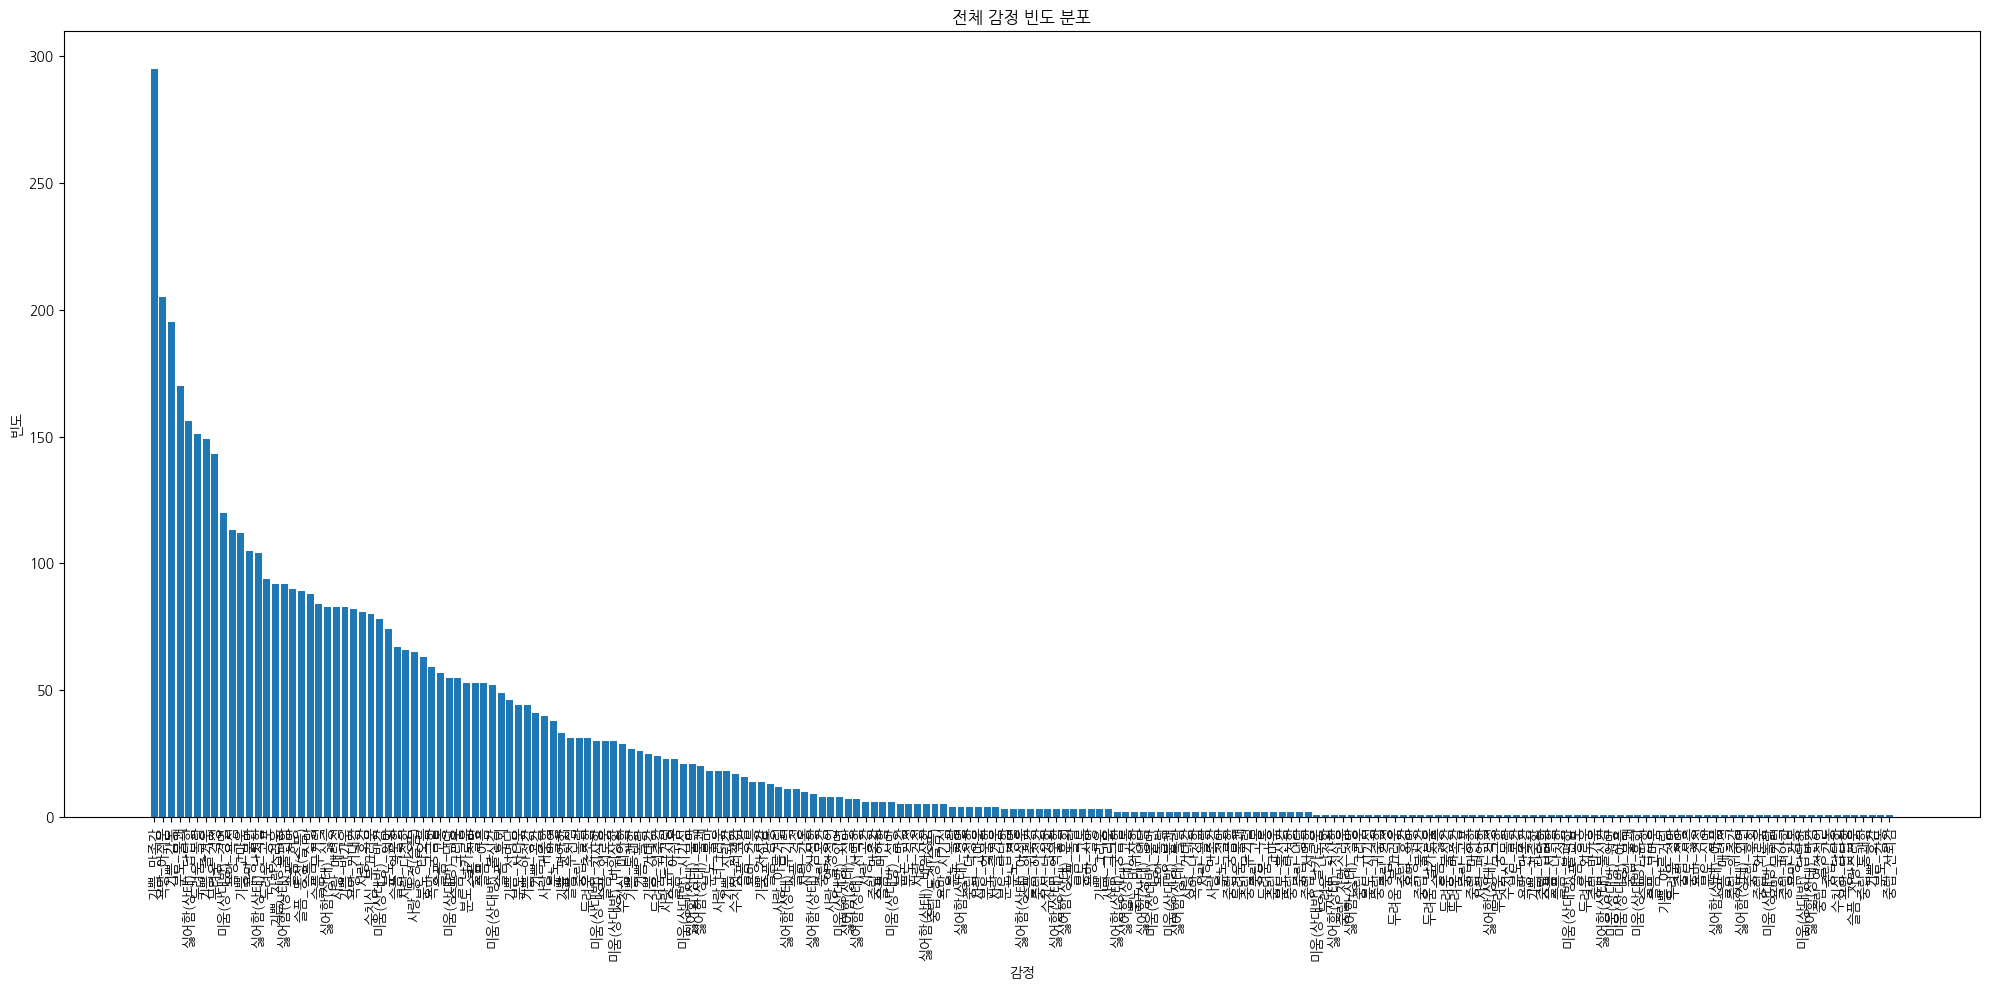

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import os

# 한글 폰트 설치 (아직 설치되지 않은 경우)
!sudo apt-get install -y fonts-nanum fonts-nanum-coding
!sudo fc-cache -fv

# matplotlib 폰트 캐시를 지우고 다시 로드하여 재구성
# 이 방법은 다양한 matplotlib 버전에서 더 안정적입니다
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['NanumGothic']
plt.rcParams['axes.unicode_minus'] = False

# 폰트 매니저가 사용 가능한 폰트 목록을 업데이트하도록 강제
fm.fontManager.addfont('/usr/share/fonts/truetype/nanum/NanumGothic.ttf') # 폰트 파일을 명시적으로 추가

# 정렬된 리스트에서 감정과 그 개수를 추출 (sorted_emotion_counts가 여전히 사용 가능하다고 가정)
emotions = [item[0] for item in sorted_emotion_counts]
counts = [item[1] for item in sorted_emotion_counts]

# 막대 그래프 생성
plt.figure(figsize=(20, 10)) # 가독성을 위해 그래프 크기 조정
plt.bar(emotions, counts)

# 제목과 레이블 설정
plt.title('전체 감정 빈도 분포')
plt.xlabel('감정')
plt.ylabel('빈도')

# x축 레이블이 겹치지 않도록 회전
plt.xticks(rotation=90)

# 그래프 표시
plt.tight_layout() # 레이블이 겹치지 않도록 레이아웃 조정
plt.show()

## 결과 해석

### Subtask:
시각화된 결과를 바탕으로 데이터셋에서 가장 흔하게 나타나는 감정들과 그 분포를 해석합니다.


## 요약:

### 데이터 분석 주요 발견사항

*   데이터셋에서 가장 빈번한 감정은 "기쁨\_만족감"이며, 그 다음으로 "욕망\_아쉬움"과 "기쁨\_감동"이 나타납니다.
*   데이터셋의 전체 감정 분포는 편향되어 있으며, 특정 감정들이 다른 감정들보다 훨씬 더 자주 나타납니다.
*   막대 그래프를 사용하여 감정 개수를 시각화하면 다양한 감정의 빈도 분포에 대한 명확한 개요를 제공합니다.

### 통찰 또는 다음 단계

*   데이터셋에서 가장 흔한 감정들이 왜 그렇게 자주 나타나는지 이해하기 위해 가장 우세한 감정들을 둘러싼 맥락을 조사합니다.
*   분포를 단순화하고 더 넓은 감정적 주제를 식별하기 위해 유사한 감정들을 그룹화하는 것을 고려합니다.


In [ ]:
import random
import pandas as pd
import numpy as np
from collections import Counter
import ast

# 감정별 동의어 사전
EMOTION_SYNONYMS = {
    '기쁨': ['행복', '즐거움', '만족', '기쁨', '신남', '통쾌함', '감동'],
    '슬픔': ['우울', '서글픔', '아픔', '슬픔', '허망', '무기력', '아쉬움'],
    '분노': ['화남', '짜증', '분노', '격분', '불만', '억울함', '타오름'],
    '욕망': ['바람', '욕망', '아쉬움', '불만', '갈망'],
    '미움': ['싫어함', '미움', '냉담', '치사함', '비위상함'],
    '두려움': ['무서움', '두려움', '놀람', '불안'],
    '수치심': ['부끄러움', '수치심', '창피함']
}

# 감정별 문장 패턴
EMOTION_PATTERNS = {
    '기쁨': ['정말 {}', '너무 {}', '진짜 {}', '완전 {}'],
    '슬픔': ['정말 {}', '너무 {}', '진짜 {}', '완전 {}'],
    '분노': ['정말 {}', '너무 {}', '진짜 {}', '완전 {}'],
    '욕망': ['정말 {}', '너무 {}', '진짜 {}'],
    '미움': ['정말 {}', '너무 {}', '진짜 {}'],
    '두려움': ['정말 {}', '너무 {}', '진짜 {}'],
    '수치심': ['정말 {}', '너무 {}', '진짜 {}']
}

def extract_emotion_from_annotation(annotation_string):
    """annotation에서 주요 감정 추출"""
    try:
        annotations = ast.literal_eval(annotation_string)
        emotions = [item['emotion'] for item in annotations if 'emotion' in item]
        if emotions:
            # 가장 빈번한 감정의 상위 카테고리 반환
            emotion_counts = Counter(emotions)
            main_emotion = emotion_counts.most_common(1)[0][0]
            return main_emotion.split('_')[0]  # '기쁨_만족감' -> '기쁨'
        return None
    except:
        return None

def synonym_replacement(text, emotion, n_replacements=1):
    """동의어 교체를 통한 증강"""
    if emotion not in EMOTION_SYNONYMS:
        return text
    
    synonyms = EMOTION_SYNONYMS[emotion]
    words = text.split()
    
    # 감정 관련 단어 찾기 및 교체
    for i, word in enumerate(words):
        if any(syn in word for syn in synonyms):
            if random.random() < 0.3:  # 30% 확률로 교체
                new_word = random.choice(synonyms)
                words[i] = word.replace(emotion, new_word)
    
    return ' '.join(words)

def pattern_augmentation(text, emotion):
    """감정별 패턴을 사용한 증강"""
    if emotion not in EMOTION_PATTERNS:
        return text
    
    patterns = EMOTION_PATTERNS[emotion]
    pattern = random.choice(patterns)
    
    # 기존 텍스트에 패턴 적용
    return pattern.format(text)

def context_augmentation(text, emotion):
    """컨텍스트 추가를 통한 증강"""
    context_prefixes = {
        '기쁨': ['오늘', '정말', '너무', '완전'],
        '슬픔': ['정말', '너무', '진짜', '완전'],
        '분노': ['정말', '너무', '진짜', '완전'],
        '욕망': ['정말', '너무', '진짜'],
        '미움': ['정말', '너무', '진짜'],
        '두려움': ['정말', '너무', '진짜'],
        '수치심': ['정말', '너무', '진짜']
    }
    
    if emotion in context_prefixes:
        prefix = random.choice(context_prefixes[emotion])
        return f"{prefix} {text}"
    
    return text

print("기본 증강 함수들이 정의되었습니다.")


## 2. 데이터 증강 파이프라인


In [ ]:
def augment_data(df, augmentation_factor=2, methods=['synonym', 'pattern', 'context']):
    """
    데이터 증강 파이프라인
    
    Args:
        df: 원본 데이터프레임
        augmentation_factor: 각 샘플당 생성할 증강 샘플 수
        methods: 사용할 증강 방법들
    
    Returns:
        증강된 데이터프레임
    """
    augmented_data = []
    
    for idx, row in df.iterrows():
        text = row['context']
        annotation = row['annotation']
        
        # 주요 감정 추출
        main_emotion = extract_emotion_from_annotation(annotation)
        
        if main_emotion is None:
            continue
        
        # 원본 데이터 추가
        augmented_data.append({
            'context': text,
            'annotation': annotation,
            'augmentation_method': 'original'
        })
        
        # 증강 방법 적용
        for _ in range(augmentation_factor):
            augmented_text = text
            
            if 'synonym' in methods:
                augmented_text = synonym_replacement(augmented_text, main_emotion)
            
            if 'pattern' in methods:
                augmented_text = pattern_augmentation(augmented_text, main_emotion)
            
            if 'context' in methods:
                augmented_text = context_augmentation(augmented_text, main_emotion)
            
            # 증강된 데이터 추가
            augmented_data.append({
                'context': augmented_text,
                'annotation': annotation,  # 감정 레이블은 유지
                'augmentation_method': '_'.join(methods)
            })
    
    return pd.DataFrame(augmented_data)

def balance_emotions(df, target_samples_per_emotion=100):
    """
    감정별 불균형 해결을 위한 가중 증강
    
    Args:
        df: 원본 데이터프레임
        target_samples_per_emotion: 감정별 목표 샘플 수
    
    Returns:
        균형잡힌 데이터프레임
    """
    # 감정별 빈도 계산
    emotion_counts = {}
    for idx, row in df.iterrows():
        emotion = extract_emotion_from_annotation(row['annotation'])
        if emotion:
            emotion_counts[emotion] = emotion_counts.get(emotion, 0) + 1
    
    print("감정별 원본 데이터 분포:")
    for emotion, count in emotion_counts.items():
        print(f"{emotion}: {count}개")
    
    balanced_data = []
    
    for emotion, current_count in emotion_counts.items():
        emotion_data = df[df['annotation'].apply(lambda x: extract_emotion_from_annotation(x) == emotion)]
        
        if current_count < target_samples_per_emotion:
            # 부족한 만큼 증강
            needed = target_samples_per_emotion - current_count
            augmentation_factor = max(1, needed // current_count)
            
            print(f"{emotion} 감정을 {augmentation_factor}배 증강합니다.")
            
            # 원본 데이터 추가
            balanced_data.extend(emotion_data.to_dict('records'))
            
            # 증강 데이터 생성
            for _ in range(augmentation_factor):
                for idx, row in emotion_data.iterrows():
                    text = row['context']
                    annotation = row['annotation']
                    
                    # 다양한 증강 방법 적용
                    augmented_text = text
                    augmented_text = synonym_replacement(augmented_text, emotion)
                    augmented_text = pattern_augmentation(augmented_text, emotion)
                    augmented_text = context_augmentation(augmented_text, emotion)
                    
                    balanced_data.append({
                        'context': augmented_text,
                        'annotation': annotation,
                        'augmentation_method': 'balanced'
                    })
        else:
            # 충분한 경우 원본만 사용
            balanced_data.extend(emotion_data.to_dict('records'))
    
    return pd.DataFrame(balanced_data)

print("데이터 증강 파이프라인이 정의되었습니다.")


## 3. 증강 실행 및 결과 확인


In [ ]:
# 원본 데이터의 일부만 사용하여 증강 테스트 (처음 100개 샘플)
sample_df = df.head(100).copy()

print("=== 원본 데이터 샘플 ===")
print(f"총 샘플 수: {len(sample_df)}")
print("\n원본 데이터 예시:")
for i in range(3):
    emotion = extract_emotion_from_annotation(sample_df.iloc[i]['annotation'])
    print(f"감정: {emotion}")
    print(f"텍스트: {sample_df.iloc[i]['context']}")
    print("-" * 50)

# 기본 증강 실행
print("\n=== 기본 증강 실행 ===")
augmented_df = augment_data(sample_df, augmentation_factor=2, methods=['synonym', 'pattern', 'context'])

print(f"증강 후 총 샘플 수: {len(augmented_df)}")
print(f"증강 비율: {len(augmented_df) / len(sample_df):.1f}배")

print("\n증강된 데이터 예시:")
augmented_samples = augmented_df[augmented_df['augmentation_method'] != 'original'].head(3)
for i, (idx, row) in enumerate(augmented_samples.iterrows()):
    emotion = extract_emotion_from_annotation(row['annotation'])
    print(f"감정: {emotion}")
    print(f"텍스트: {row['context']}")
    print(f"증강 방법: {row['augmentation_method']}")
    print("-" * 50)


In [ ]:
# 감정별 불균형 해결을 위한 가중 증강
print("=== 감정별 불균형 해결 ===")
balanced_df = balance_emotions(sample_df, target_samples_per_emotion=50)

print(f"\n균형 조정 후 총 샘플 수: {len(balanced_df)}")

# 감정별 분포 확인
emotion_counts_balanced = {}
for idx, row in balanced_df.iterrows():
    emotion = extract_emotion_from_annotation(row['annotation'])
    if emotion:
        emotion_counts_balanced[emotion] = emotion_counts_balanced.get(emotion, 0) + 1

print("\n균형 조정 후 감정별 분포:")
for emotion, count in sorted(emotion_counts_balanced.items()):
    print(f"{emotion}: {count}개")

# 증강된 데이터를 파일로 저장
augmented_df.to_csv("augmented_emotion_data.csv", index=False, encoding='utf-8')
balanced_df.to_csv("balanced_emotion_data.csv", index=False, encoding='utf-8')

print("\n증강된 데이터가 파일로 저장되었습니다:")
print("- augmented_emotion_data.csv: 기본 증강 데이터")
print("- balanced_emotion_data.csv: 균형 조정된 데이터")


## 4. 고급 증강 방법들

### A. 백번역 (Back Translation)
```python
# Google Translate API를 사용한 백번역
from googletrans import Translator

def back_translation_augmentation(text, target_languages=['en', 'ja']):
    """백번역을 통한 데이터 증강"""
    translator = Translator()
    augmented_texts = []
    
    for lang in target_languages:
        try:
            # 원문 → 외국어 → 다시 한국어
            translated = translator.translate(text, dest=lang)
            back_translated = translator.translate(translated.text, dest='ko')
            augmented_texts.append(back_translated.text)
        except:
            continue
    
    return augmented_texts
```

### B. GPT 기반 증강
```python
# OpenAI API를 사용한 GPT 기반 증강
import openai

def gpt_augmentation(text, emotion, n_samples=2):
    """GPT를 사용한 감정 유지 증강"""
    prompt = f"""
    다음 문장과 같은 감정({emotion})을 표현하는 새로운 문장을 {n_samples}개 만들어주세요:
    원문: {text}
    
    조건:
    1. 같은 감정을 표현해야 함
    2. 자연스러운 한국어 문장
    3. 원문과 다른 표현 방식 사용
    4. 각 문장을 줄바꿈으로 구분
    """
    
    try:
        response = openai.ChatCompletion.create(
            model="gpt-3.5-turbo",
            messages=[{"role": "user", "content": prompt}],
            max_tokens=200
        )
        
        augmented_texts = response.choices[0].message.content.strip().split('\n')
        return [text.strip() for text in augmented_texts if text.strip()]
    except:
        return []
```

### C. 문장 구조 변환
```python
def sentence_restructuring(text, emotion):
    """문장 구조를 바꾸면서 의미와 감정 유지"""
    restructuring_patterns = {
        '기쁨': [
            lambda x: x.replace('기뻐요', '행복해요'),
            lambda x: x.replace('즐거워요', '신나요'),
            lambda x: x.replace('만족해요', '기뻐요')
        ],
        '슬픔': [
            lambda x: x.replace('슬퍼요', '우울해요'),
            lambda x: x.replace('아파요', '서글퍼요'),
            lambda x: x.replace('힘들어요', '지쳐요')
        ],
        '분노': [
            lambda x: x.replace('화나요', '짜증나요'),
            lambda x: x.replace('분노해요', '격분해요'),
            lambda x: x.replace('억울해요', '분통해요')
        ]
    }
    
    if emotion in restructuring_patterns:
        patterns = restructuring_patterns[emotion]
        pattern = random.choice(patterns)
        return pattern(text)
    
    return text
```

### D. 컨텍스트 확장
```python
def context_expansion(text, emotion):
    """감정에 맞는 컨텍스트를 추가하여 문장 확장"""
    context_templates = {
        '기쁨': [
            '오늘 정말 {}',
            '너무 {}',
            '진짜 {}',
            '완전 {}'
        ],
        '슬픔': [
            '정말 {}',
            '너무 {}',
            '진짜 {}',
            '완전 {}'
        ],
        '분노': [
            '정말 {}',
            '너무 {}',
            '진짜 {}',
            '완전 {}'
        ]
    }
    
    if emotion in context_templates:
        templates = context_templates[emotion]
        template = random.choice(templates)
        return template.format(text)
    
    return text
```


# 데이터 증강 방법 구현

## 1. 기본 증강 함수들
